<a href="https://colab.research.google.com/github/susamogus154/computational_physics/blob/main/HRK_3_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def simulate(total_time, dt, b):
  steps = int(total_time / dt)
  # initializing arrays
  t = np.linspace(0, total_time, steps)
  y = np.zeros(steps)
  v = np.zeros(steps)

  # initializing motion, values given in problem
  y[0] = 0.0      # Starting height (m)
  v[0] = 50.0      # Initial velocity (m/s)
  m = 10.0        # Mass of th object

  # Variables to find
  peak_position = y[0]
  peak_position_index = 0

  # Euler method simulation/loop
  for i in range(1, steps):
      # Velocity update:
      net_f = -b*v[i-1]-10*m
      a = net_f/m
      v[i] = v[i-1] + a * dt
      y[i] = y[i-1] + v[i] * dt
      # print(f"a={a} v={v[i]} y={y[i]}")

      if y[i] > peak_position:
          peak_position = y[i]
          peak_position_index = i

  return t, y, v, peak_position, peak_position_index

# Plotting

As the dt approaches zero, the maximum position monotonically increases.


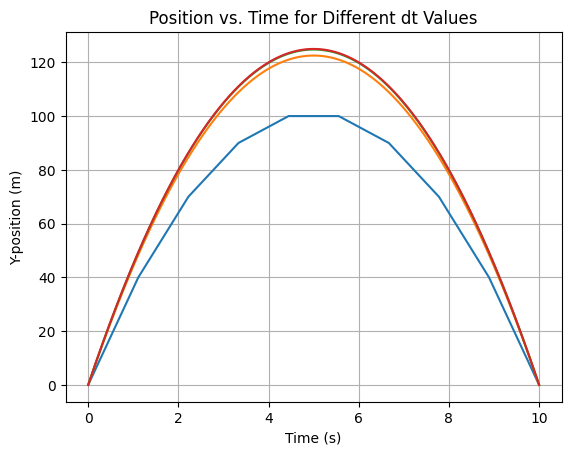

In [ ]:
# Part A

for dt in [1.0, 0.1, 0.01, 0.001]:
  t, y, _, peak_position, _ = simulate(10, dt, 0)

  plt.plot(
      t[:y.size],
      y[:y.size]
  )

plt.title("Position vs. Time for Different dt Values")
plt.xlabel("Time (s)")
plt.ylabel("Y-position (m)")
plt.grid(True)

print("As the dt approaches zero, the maximum position monotonically increases.")

As b gets higher, the maximum height monotonically decreases and so
does the range, and the object peaks and lands earlier.However, the higher drag
coefficients also prevent the object from falling at a faster rate, a.k.a.
decreasing its terminal velocity.


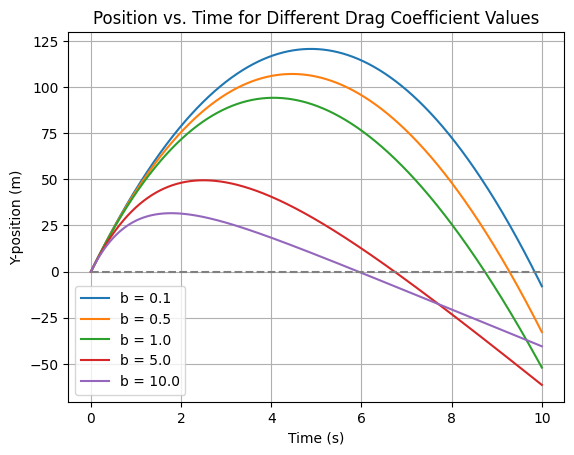

In [ ]:
# Part B
drag_coef_list = [0.1, 0.5, 1.0, 5.0, 10.0]

for b in drag_coef_list:
  t, y, _, peak_position, _ = simulate(10, 0.01, b)

  plt.plot(
      t[:y.size],
      y[:y.size],
      label = f'b = {b}'
  )

plt.plot([0, 10], [0, 0], linestyle='dashed', color = 'gray')

plt.title("Position vs. Time for Different Drag Coefficient Values")
plt.xlabel("Time (s)")
plt.ylabel("Y-position (m)")
plt.grid(True)
plt.legend()

print("""As b gets higher, the maximum height monotonically decreases and so
does the range, and the object peaks and lands earlier.However, the higher drag
coefficients also prevent the object from falling at a faster rate, a.k.a.
decreasing its terminal velocity.""")